#K - Means Clustering ( Tugas 5 )

Link Colab : https://colab.research.google.com/drive/1MyElto3v5yh3_Dw2YJtO4iWSXl1X4hX9?authuser=1#scrollTo=p4YHfp_BH7BV

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')

from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

import csv
with open('iris.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    writer.writerow(iris.feature_names)
    writer.writerows(iris.data.tolist())

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html for the full API
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(iris.data)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


**Implement k-means clustering in Python**

You are now ready to add implementations. You are expected to fully implement mathematical operations instead of using library functions like scikit or statsmodels. Your implementation is probably making some assumptions about the input it is given. Make that explicit in the comments. Also, provide an estimate of how long your algorithm's execution will take depending on the input values. Express this estimate as a function of inputs, such as the number of clusters and/or the number of data points.

In [ ]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Assign every training example x^(i) to its closest centroid, given the current centroid positions
def find_closest_centroids(X, centroids):
    '''returns the array of assigned clusters to each example ''' 
    m = X.shape[0] # no of datappints
    k = centroids.shape[0]  #division size
    idx = np.zeros(m) # array to assign the centriod
    
    # Your Code Here
    for i in range (X.shape[0]):
        distances = np.linalg.norm(X[i]-centroids, axis=1)
        min_dist = np.argmin(distances)
        idx[i] = min_dist
    
    
    return idx

In [ ]:
# Update Centroids
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))  #3*4
    '''Return Updated Values of all K centroids'''
    
    # Your Code Here
    for i in range(k):
        centroids[i,:] = np.mean(X[idx.ravel() == i,:], axis = 0)
    
    return centroids        
    

In [ ]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        # find closest centroid
        idx = find_closest_centroids(X, centroids)
        #update centroids
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids
 

In [ ]:
X=iris.data
np.random.shuffle(X)
cluster1 = X[0:50,:]
cluster2 = X[50:100,:]
cluster3 = X[100:150,:]

In [ ]:
initial_centroids = initial_centroids = np.array([X[random.randint(0,50)], X[random.randint(50,100)], X[random.randint(100,150)]])
# Select k=3 , pick 3 random centroids from data
idx, centroids = run_k_means(X, initial_centroids, 2000)# use 1000 iterations to perform clustering

In [ ]:
k_Meancluster1 = X[np.where(idx == 0)[0],:]
k_Meancluster2 = X[np.where(idx == 1)[0],:]
k_Meancluster3 = X[np.where(idx == 2)[0],:]

**Add a visualisation**

Identify a suitable library to depict both your inputs as well as the results of k-means clustering applied to those inputs.

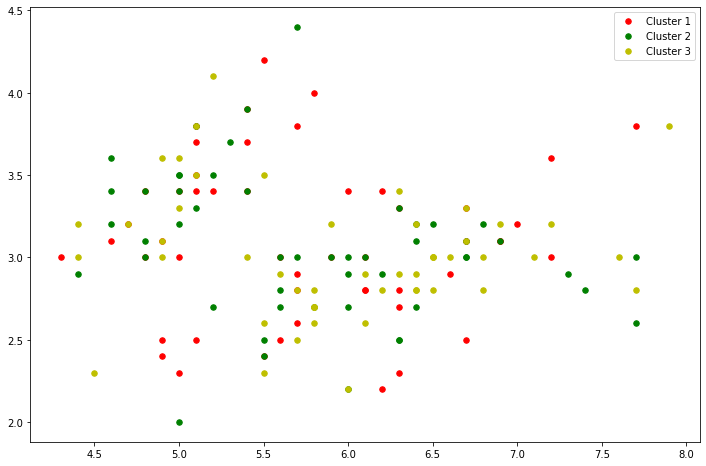

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='y', label='Cluster 3')
ax.legend()

**Now let’s visuaize the Clusters form by our k-mean**

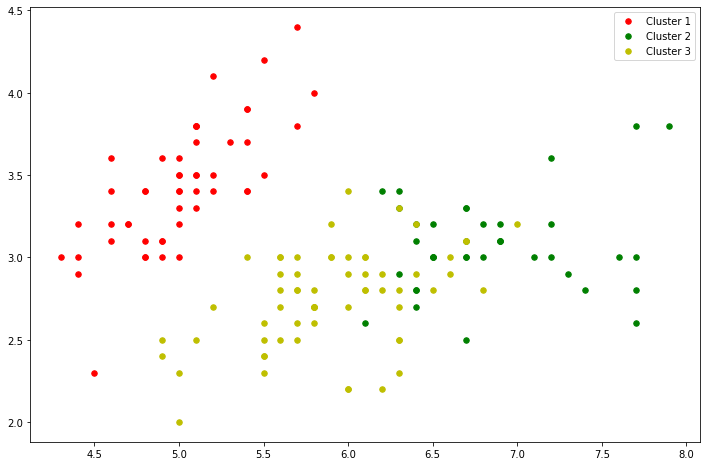

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(k_Meancluster1[:,0], k_Meancluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(k_Meancluster2[:,0], k_Meancluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(k_Meancluster3[:,0], k_Meancluster3[:,1], s=30, color='y', label='Cluster 3')
ax.legend()